# Collecting data from Reddit's API
Emilio Lehoucq - 4/17/23

## Installing libraries

In [1]:
pip install praw

## Importing libraries

In [2]:
import praw
from time import sleep
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_rows', None)

## Collecting data

In [3]:
# Authenticating
reddit = praw.Reddit(
    # https://praw.readthedocs.io/en/stable/getting_started/authentication.html#
    # https://www.reddit.com/prefs/apps/
    client_id="XXXXXXXXXXX",
    client_secret="XXXXXXXXXXX",
    password="XXXXXXXXXXX",
    user_agent="Data for mindfulness project",
    username="XXXXXXXXXXX",
    # https://www.reddit.com/r/redditdev/comments/levqr0/it_appears_that_you_are_using_praw_in_an/
    check_for_async=False
)

# Creating dictionary to store data
data = {
    # https://praw.readthedocs.io/en/stable/code_overview/models/submission.html
    'subreddit': [],
    'author': [],
    'comments': [],
    'created_utc': [],
    'is_self': [],
    'name': [],
    'num_comments': [],
    'permalink': [],
    'score': [],
    'selftext': [],
    'stickied': [],
    'title': [],
    'upvote_ratio': [],
    'url': []
}

# subreddits I want posts from
subreddits = ['Meditation', 'Mindfulness', 'Headspace', 'Buddhism']
# Meditation: 2.3M members, top 1% by size
# "This community is for sharing experiences, stories and instructions relating to the practice of meditation."
# Mindfulness: 1.4M members, top 1% by size
# "Mindfulness is awareness of one's internal states and surroundings."
# Headspace: 16K members, top 5% by size
# Buddhism: 685K members, top 1% by size
# "A Reddit for all kinds of Buddhist teachings"

# Number of posts per subreddit
NUM_POSTS = 1000 # I think this is the limit

# Iterating over subreddits
counter = 0
for subreddit in subreddits:
  # Iterating over number of posts per subreddit (get the max)
  # Hot items is the default when a user goes into Reddit
  for submission in reddit.subreddit(subreddit).hot(limit=NUM_POSTS):
    data['subreddit'].append(subreddit)
    data['author'].append(submission.author)
    data['comments'].append(submission.comments)
    data['created_utc'].append(submission.created_utc)
    data['is_self'].append(submission.is_self)
    data['name'].append(submission.name)
    data['num_comments'].append(submission.num_comments)
    data['permalink'].append(submission.permalink)
    data['score'].append(submission.score)
    data['selftext'].append(submission.selftext)
    data['stickied'].append(submission.stickied)
    data['title'].append(submission.title)
    data['upvote_ratio'].append(submission.upvote_ratio)
    data['url'].append(submission.url)
    # Run into TooManyRequests: received 429 HTTP response, so decided to add some sleep time
    # Not sure whether this is the right time to sleep. I thought praw handled rate limits
    sleep(1)
  # I don't want to wait 10 minutes after the last subreddit...
  if counter < len(subreddits)-1:
    sleep(600)
    counter += 1

## Checking data looks ok

In [4]:
# Converting to data frame
df = pd.DataFrame(data)

In [5]:
# Exploring what data looks like
df.head()

,subreddit,author,comments,created_utc,is_self,name,num_comments,permalink,score,selftext,stickied,title,upvote_ratio,url
0,Meditation,AutoModerator,"(kygiq5o, kywvgm3, ky04tvs, kzt434n)",1.711930e+09,True,t3_1bsp5fq,14,/r/Meditation/comments/1bsp5fq/monthly_meditat...,13,"Hello friends,\n\nReady to make meditation a h...",True,Monthly Meditation Challenge - April 2024,0.93,https://www.reddit.com/r/Meditation/comments/1...
1,Meditation,ThekzyV2,"(kzzcuvh, kzzv9go, kzza08j, kzzbejh, kzzaors, ...",1.713358e+09,True,t3_1c68vxk,14,/r/Meditation/comments/1c68vxk/as_much_as_we_t...,26,"I would say, as a radical, that all the stuff ...",False,"As much as we trust our parents, theyve taught...",0.84,https://www.reddit.com/r/Meditation/comments/1...
2,Meditation,opensourceartwork,"(kzyvevq, kzyy24a, kzyxl1i, kzyurx1, kzz12cs, ...",1.713350e+09,True,t3_1c66kfx,202,/r/Meditation/comments/1c66kfx/i_had_a_friend_...,30,Curious to hear y'alls opinion?\n\nEDIT: I gue...,False,I had a friend tell me mediation is brainwashi...,0.63,https://www.reddit.com/r/Meditation/comments/1...
3,Meditation,Grox213,"(kzz71k8, kzzo6a7, kzzlfro, kzzq9ru, l00bz01, ...",1.713357e+09,True,t3_1c68hsk,18,/r/Meditation/comments/1c68hsk/what_do_the_mon...,13,Monks say that THERE is a right way to meditat...,False,What do the monks say?,0.84,https://www.reddit.com/r/Meditation/comments/1...
4,Meditation,littleb1rd_,"(l00ar77, l00fzex, l016sgj, l016yk9, l00av9a)",1.713369e+09,True,t3_1c6d4gq,7,/r/Meditation/comments/1c6d4gq/im_a_skeptic_bu...,7,this happened several years ago but i just rem...,False,im a skeptic but tried past life regression an...,0.89,https://www.reddit.com/r/Meditation/comments/1...


In [6]:
# Making sure I got posts for all subreddits
df['subreddit'].value_counts()

subreddit
Headspace      1000
Buddhism        989
Meditation      823
Mindfulness     701
Name: count, dtype: int64

In [7]:
# Making sure data as expected
assert df.shape[1] == 14
assert df['subreddit'].isnull().sum() == 0
assert df['comments'].isnull().sum() == 0
assert df['created_utc'].isnull().sum() == 0
assert df['is_self'].isnull().sum() == 0
assert df['name'].isnull().sum() == 0
assert df['num_comments'].isnull().sum() == 0
assert df['permalink'].isnull().sum() == 0
assert df['score'].isnull().sum() == 0
assert df['selftext'].isnull().sum() == 0
assert df['stickied'].isnull().sum() == 0
assert df['title'].isnull().sum() == 0
assert df['upvote_ratio'].isnull().sum() == 0
assert df['url'].isnull().sum() == 0

In [8]:
df['author'].isna().value_counts()
# Not sure why some authors are none, but very few

author
False    3405
True      108
Name: count, dtype: int64

In [9]:
# Taking a look at what the data with None authors looks like
df[df['author'].isna()]

,subreddit,author,comments,created_utc,is_self,name,num_comments,permalink,score,selftext,stickied,title,upvote_ratio,url
409,Meditation,None,"(ky831o6, ky841o6)",1.712347e+09,True,t3_1bwrlce,2,/r/Meditation/comments/1bwrlce/walking_meditat...,3,"What is the goal of meditation; insight, being...",False,Walking meditation,0.80,https://www.reddit.com/r/Meditation/comments/1...
676,Meditation,None,"(kwz8a1l, kwzhlse, kwzid2c, kx0y62u, kx394le)",1.711643e+09,True,t3_1bpzhzh,9,/r/Meditation/comments/1bpzhzh/modifying_tradi...,2,"Hello everyone,\n\nI have been meditating for ...",False,Modifying traditional meditation poses?,1.00,https://www.reddit.com/r/Meditation/comments/1...
766,Meditation,None,"(kwj28fv, kwjd6pl, kwjx6ub, kwiy3wd, kwj14js, ...",1.711392e+09,True,t3_1bnl7sj,37,/r/Meditation/comments/1bnl7sj/question_about_...,9,"Osho's quotes:\n""That's my meaning. I don't kn...",False,Question about Osho's view on money - only for...,0.65,https://www.reddit.com/r/Meditation/comments/1...
974,Mindfulness,None,"(kwens3v, kwe1u9k, kwf3dqv, kwfppxx, kwhiwuk, ...",1.711309e+09,True,t3_1bmta9o,28,/r/Mindfulness/comments/1bmta9o/how_to_practic...,6,…when you have a large busy family life and ve...,False,How to practice mindfulness throughout day…?,0.81,https://www.reddit.com/r/Mindfulness/comments/...
1046,Mindfulness,None,"(kuj4o9v, kuh5dv5, kuhxubh, kuik91w)",1.710202e+09,True,t3_1bcit2j,10,/r/Mindfulness/comments/1bcit2j/i_could_use_so...,15,I am a spiritual person who takes a great deal...,False,I could use some tips on creating more mindful...,1.00,https://www.reddit.com/r/Mindfulness/comments/...
1057,Mindfulness,None,"(ku3scud, ku3uaig, ku4ipqa, ku4jm2m)",1.710000e+09,True,t3_1bal2ds,4,/r/Mindfulness/comments/1bal2ds/likes_and_disl...,3,Hello there. \n\nI have a question based on ou...,False,Likes and dislikes ¦ transcendence ¦ spirituality,0.81,https://www.reddit.com/r/Mindfulness/comments/...
1095,Mindfulness,None,"(ktephga, ktccp59, ktc5hkg, ktcppnb, ktej4on, ...",1.709575e+09,True,t3_1b6hdhj,21,/r/Mindfulness/comments/1b6hdhj/how_do_i_stop_...,15,"These unwanted thoughts abut existence, life/d...",False,How do I stop ruminating thoughts about existe...,0.95,https://www.reddit.com/r/Mindfulness/comments/...
1121,Mindfulness,None,(),1.709325e+09,True,t3_1b44tyo,0,/r/Mindfulness/comments/1b44tyo/coping_with_je...,1,I’m not sure if this is the right sub to creat...,False,"Coping with jealousy, sorrow and bitterness",1.00,https://www.reddit.com/r/Mindfulness/comments/...
1126,Mindfulness,None,(ksv1ok0),1.709230e+09,True,t3_1b36qzq,1,/r/Mindfulness/comments/1b36qzq/i_finally_real...,6,I am someone who is always looking to learn an...,False,I finally realized the destructiveness of some...,1.00,https://www.reddit.com/r/Mindfulness/comments/...
1147,Mindfulness,None,"(ksccx6l, ks8vprk)",1.708964e+09,True,t3_1b0le5x,3,/r/Mindfulness/comments/1b0le5x/i_kind_of_forg...,6,I used to be mindful 3-4 months back because m...,False,I kind of forgot how to be mindful,0.80,https://www.reddit.com/r/Mindfulness/comments/...


In [10]:
# Number of posts with text (rather than image, video)
print(df[df['selftext'] != ''].shape)

# Proportion of posts with text
df[df['selftext'] != ''].shape[0] / df.shape[0]

(3132, 14)


0.8915456874466268

Quantiles: [  228.   451.   885. 26403.] 

Number of posts 1500 characters or more: 355



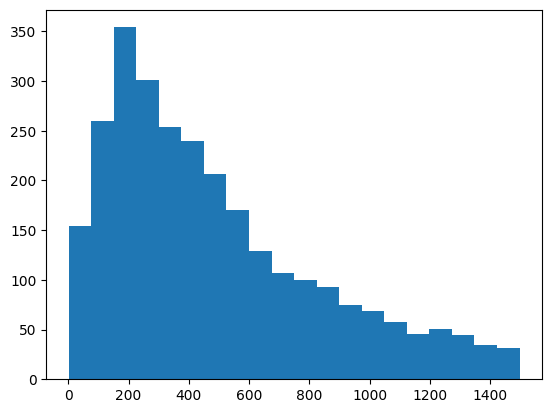

In [11]:
# Exploring how long the text is (if there is text in the first place)
characters = [len(text) for text in df['selftext'] if text != '']

# Quantiles of distribution of number of characters in posts
print("Quantiles:", np.quantile(characters, [0.25, 0.5, 0.75, 1]), '\n')

# Number of posts equal to or above threshold
THRESHOLD = 1500
print(f'Number of posts {THRESHOLD} characters or more: {len([char for char in characters if char >= THRESHOLD])}\n')

# Plotting distribution below threshold
plt.hist([char for char in characters if char < THRESHOLD], bins = 20)
plt.show()

## Exporting data to CSV

In [12]:
df.to_csv('reddit_mindfulness.csv')